<a href="https://colab.research.google.com/github/srihasra-2002/Brain_tumor/blob/main/Brain_Tumor_Detection_LS_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/brain_tumor_dataset'
folders = os.listdir(dataset_path)
print(folders)

Mounted at /content/drive
['yes', 'no']


In [4]:
subdirs = os.listdir(dataset_path)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(dataset_path+'/'+subdir))} images")

yes contains 155 images
no contains 98 images


In [5]:
def load_images(folder):

    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1

    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [7]:
data, labels = load_images(dataset_path)
data.shape, labels.shape

((253, 128, 128), (253,))

In [8]:
def plot_images(start, end):
    plt.figure(figsize=(22,8))
    for i in range(10):
        axs = plt.subplot(2,5, i+1)
        idx = np.random.randint(start, end)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('on')
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        plt.subplots_adjust(wspace=None, hspace=None)

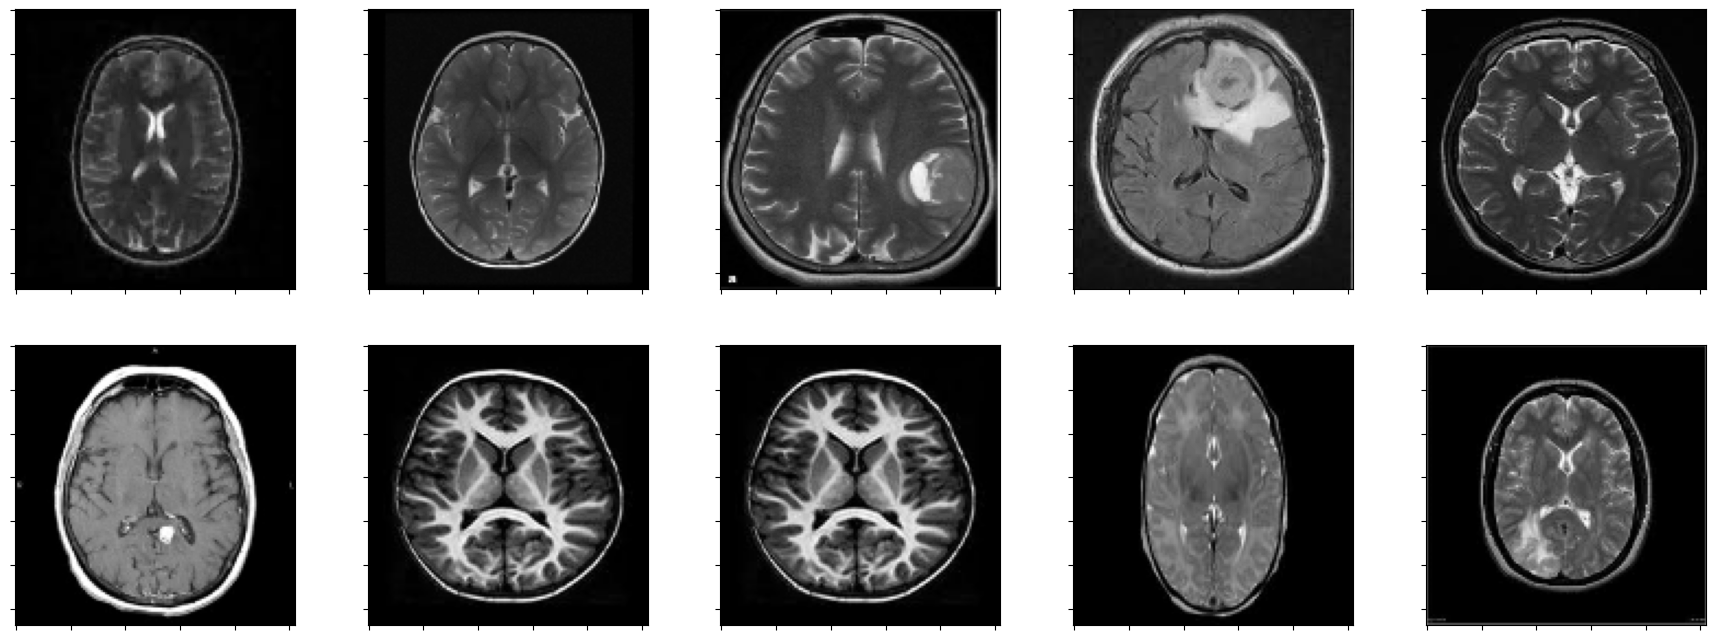

In [9]:
plot_images(98,252)

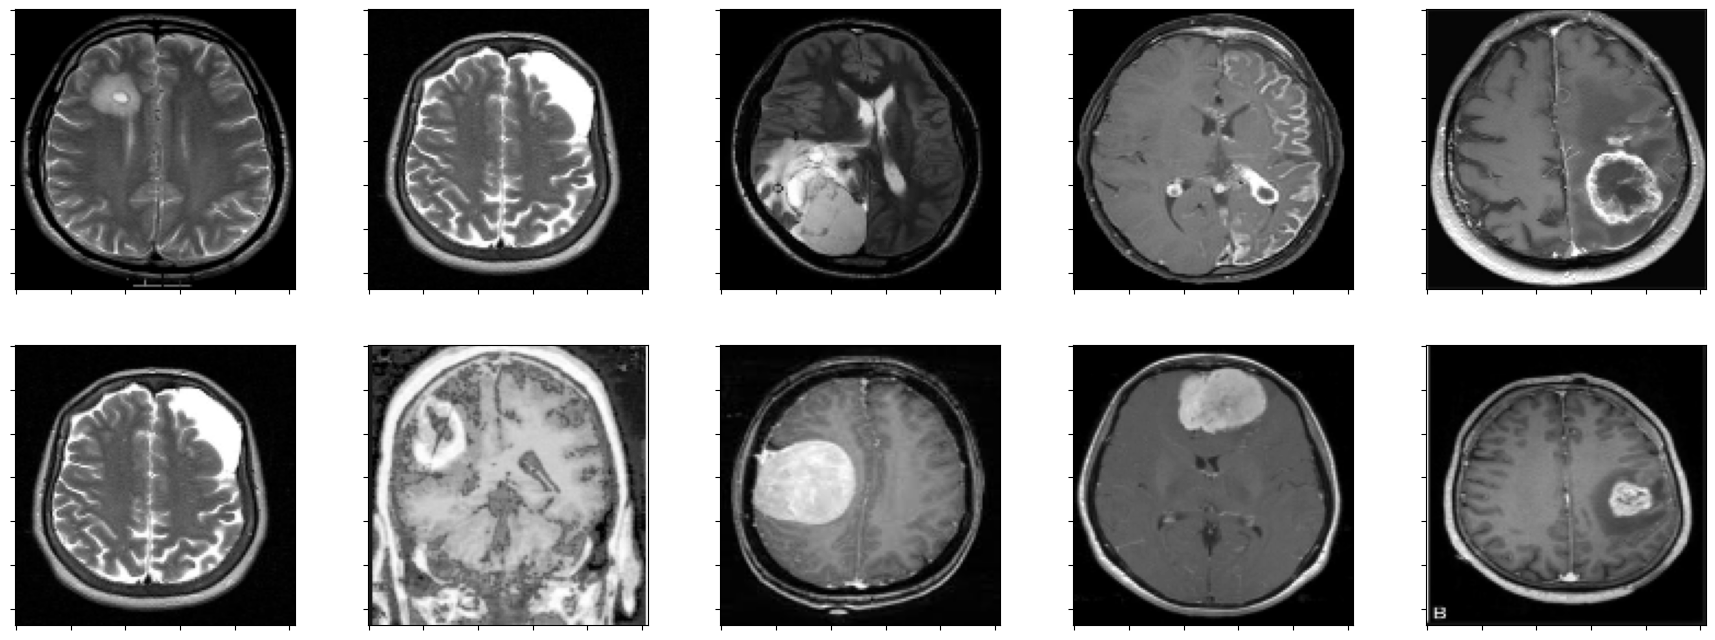

In [10]:
plot_images(0,97)

In [11]:
norm_data = data / 255.
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

((253, 128, 128, 1),
 array([[[0.00392157],
         [0.00392157],
         [0.00784314],
         ...,
         [0.00392157],
         [0.00784314],
         [0.00784314]],
 
        [[0.        ],
         [0.        ],
         [0.00392157],
         ...,
         [0.00784314],
         [0.00392157],
         [0.00784314]],
 
        [[0.        ],
         [0.00392157],
         [0.00392157],
         ...,
         [0.01176471],
         [0.        ],
         [0.00392157]],
 
        ...,
 
        [[0.01568627],
         [0.00784314],
         [0.        ],
         ...,
         [0.00784314],
         [0.00392157],
         [0.00392157]],
 
        [[0.00392157],
         [0.00784314],
         [0.00392157],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        [[0.01176471],
         [0.01568627],
         [0.01176471],
         ...,
         [0.01960784],
         [0.01960784],
         [0.00784314]]]))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(norm_data, labels, test_size=0.2, random_state=42)

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [13]:
clf = LinearSVC()
clf.fit(X_train_flat, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [14]:
y_pred = clf.predict(X_test_flat)

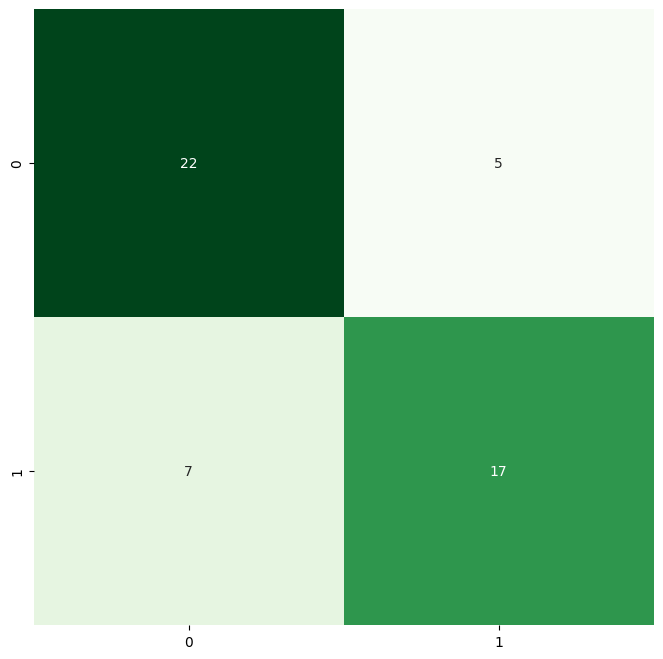

In [15]:
plt.figure(figsize = (8,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = ".2g", cbar = False)
plt.show()

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7647058823529411


In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.77      0.71      0.74        24

    accuracy                           0.76        51
   macro avg       0.77      0.76      0.76        51
weighted avg       0.77      0.76      0.76        51



In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[22  5]
 [ 7 17]]


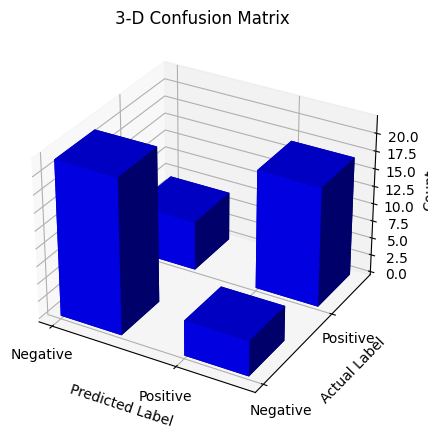

In [19]:
confusion_matrix = np.array(cm)

x_coords, y_coords = np.meshgrid(np.arange(confusion_matrix.shape[0]), np.arange(confusion_matrix.shape[1]))
x_coords, y_coords = x_coords.flatten(), y_coords.flatten()
z_coords = np.zeros_like(x_coords)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x_coords, y_coords, z_coords, dx=0.5, dy=0.5, dz=confusion_matrix.flatten(), color='b')

ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_zlabel('Count')
ax.set_title('3-D Confusion Matrix')

ax.set_xticks(np.arange(confusion_matrix.shape[0]))
ax.set_yticks(np.arange(confusion_matrix.shape[1]))
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])

plt.show()

In [24]:
def upload_image_from_directory(directory):
    img_path = os.path.join(directory, "/content/bt.jpeg")  # Specify the name of the image to upload
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (128, 128))
    norm_img = resized_img / 255.
    norm_img = np.expand_dims(norm_img, axis=0)
    return norm_img

In [26]:
uploaded_img = upload_image_from_directory(dataset_path)

# Predict the presence of a brain tumor using the LS-SVM model
prediction = clf.predict(uploaded_img.reshape(1, -1))

if prediction[0] == 1:
    print("A brain tumor is detected in the uploaded image.")
else:
    print("No brain tumor detected in the uploaded image.")

A brain tumor is detected in the uploaded image.
